In [25]:
import numpy as np

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# X: (Feature 1, Feature 2)
X = np.array([[5, 40], [8, 82], [6, 52]], dtype=float)
# y: Target
y = np.array([[15], [24], [18]], dtype=float)

# Scaling units

X = X/np.max(X, axis=0)
y = y/ max(y)


# Neural network class
class Neural_Network(object):
    def __init__(self) -> None:
        # parameters
        self.inputSize = 2 # two input nodes
        self.outputSize = 1 # output node 
        self.hiddenSize = 3 # number nodes in the hidden layers
        
        # initial weights 
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # (3*2) matrix from input to hidden layer
        ''' 
        sample weight w1
        [[-0.03891445  1.53398349 -0.38474896]
        [-0.03781903 -1.480181    1.05871854]]
        '''
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (3*1)matrix from hidden to output layer
        
    def forward(self, X):
        # forward propagation through network
        # calculate input to the hidden layer and output from the hidden layer
        self.hidden_layer_input = np.dot(X, self.W1)
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_input)
        
        # calculate input to output layer and output from the output layer
        self.output_layer_input = np.dot(self.hidden_layer_output, self.W2)
        final_output = self.sigmoid(self.output_layer_input)
        
        return final_output
    
    def backward(self, X, y, o):
        # backward propagation through the network
        
        # calculate error in the ouput
        self.output_error = y - o
        self.output_delta = self.output_error * self.sigmoidPrime(o)
        
        self.hidden_error = self.output_delta.dot(self.W2.T)
        self.hidden_delta = self.hidden_error * self.sigmoidPrime(self.hidden_layer_output)
        
        self.W1 += X.T.dot(self.hidden_delta) 
        self.W2 += self.hidden_layer_output.T.dot(self.output_delta)
        
    
    def sigmoid(self, s):
        # activtion function
        return 1 / (1 + np.exp(-s))
    
    def sigmoidPrime(self, s):
        # derivative of sigmoid function
        return s * (1-s)
    
    def train(self, X, y):
        o = self.forward(X)
        self.backward(X, y, o)
    
NN = Neural_Network()
loss = []
epochs = 400
for i in range(epochs):
    loss.append(np.mean(np.square(y - NN.forward(X))))
    NN.train(X, y)
    



In [28]:
print(loss)

[0.3832784193353558, 0.30921336039897723, 0.22871865673990424, 0.15700702997190774, 0.10508523656525758, 0.07248671184532392, 0.05309190364918278, 0.0414918412644466, 0.03434539411227457, 0.02978546468381882, 0.026777402670355204, 0.024733778340673352, 0.023309576048506253, 0.022294996464830404, 0.02155826435783197, 0.021014168385942476, 0.020606171804223597, 0.020295906007584987, 0.020056811290454033, 0.01987018024607352, 0.019722633779550885, 0.019604474284463387, 0.019508589062016177, 0.019429706613820732, 0.01936388383313158, 0.019308147076814306, 0.019260237519187144, 0.019218428262773892, 0.019181391519283057, 0.01914810117739117, 0.019117760674107993, 0.019089749154575442, 0.0190635809805, 0.019038875069807077, 0.0190153315369565, 0.0189927137958724, 0.0189708347785888, 0.018949546274516046, 0.01892873064956514, 0.018908294389825872, 0.018888163050827318, 0.018868277294382597, 0.018848589770331207, 0.01882906265703245, 0.01880966571716735, 0.01879037475784449, 0.0187711704087735

In [7]:
print("feature matrix is: ", X)
print("target vector is: ", y)
print(np.random.randn(2, 3))
print(np.random.randn(3, 1))

feature matrix is:  [[0.625      0.48780488]
 [1.         1.        ]
 [0.75       0.63414634]]
target vector is:  [[0.625]
 [1.   ]
 [0.75 ]]
[[ 2.32977412 -0.89108464 -0.84222039]
 [ 0.40926366 -1.19737565  1.8755337 ]]
[[-1.44423416]
 [ 0.97979989]
 [-0.79499595]]


0.2590345201394548

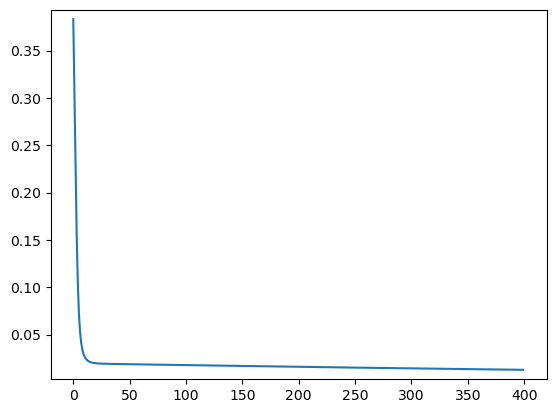

In [34]:
# Visualizing the loss in real-time
# Visualizing the loss in real-time
plt.axis([-20, epochs + 20, loss[-1] - 0.01, loss[0] + 0.01])

# plt.set_xlabel('Epochs', weight='bold', fontsize=16)
# plt.set_ylabel('Loss', weight='bold', fontsize=16)

plt.plot(np.arange(400), loss)
plt.show()


    
